In [ ]:
# https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51

In [1]:
import numpy as np 
import pandas as pd


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

In [4]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [5]:
# Data scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [6]:
# Covariance matrix
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [7]:
# Eigendecomposition
values, vectors = np.linalg.eig(cov_matrix)


In [8]:
# eigen values
values[:5]

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [9]:
# eigen vectors
vectors[:5]

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [10]:
# explained variances for each PCA
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0000000000000002 
 [0.7277045209380134, 0.23030523267680653, 0.03683831957627385, 0.005151926808906338]


In [11]:
# Visualizations
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa


<AxesSubplot: xlabel='PC1'>

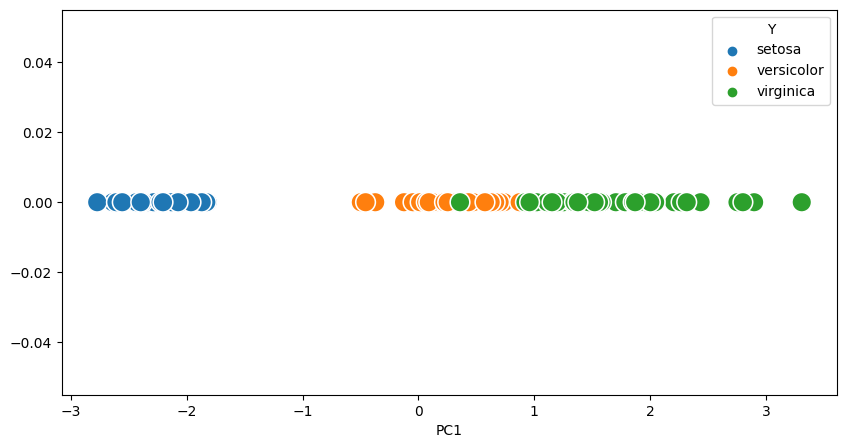

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(x=res['PC1'], y=[0] * len(res), hue=res['Y'], s=200)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

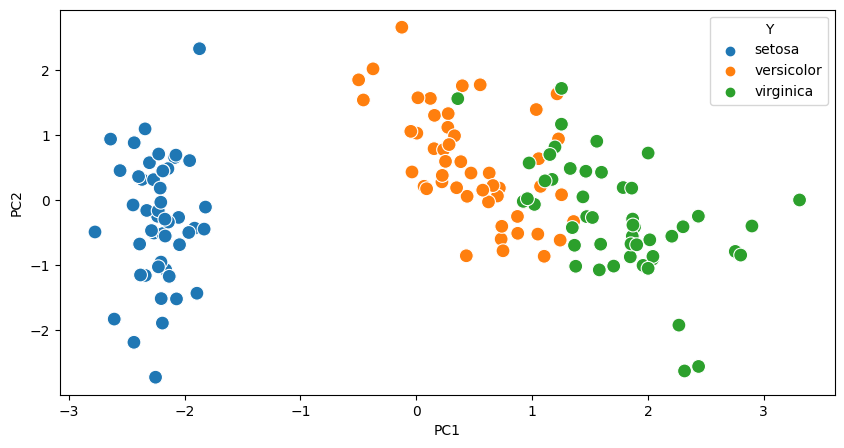

In [22]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=res['PC1'], y=res['PC2'], hue=res['Y'], s=100)